In [71]:
import pandas as pd

df = pd.read_csv('data/특수형태근로종사자.csv', encoding='utf-8-sig')

In [72]:


import rhinoMorph
rn = rhinoMorph.startRhino()

#stop_words = "은 이 것 등 더 를 좀 즉 인 옹 때 만 원 이때 개 일 기 시 럭 갤 성 삼 스 폰 트 드 기 이 리 폴 사 전 마 자 플 블 가 해주시 때 임"
stop_words= "은정 자원관리도우미 은 이 것 등 더 를 좀 즉 인 옹 때 만 원 이때 개 일 기 시 럭 갤 성 삼 스 폰 트 드 기 이 리 폴 사 전 마 자 플 블 가 해주시 때 임 하 있 되 않 었 사람 지 보 때 같 년 대하 주 말 일 위하 때문 말하 가 받 그렇 알 하 경우 가요"
stop_words = stop_words.split(' ')
stop_words[0:10]

filepath:  C:\Users\admin\AppData\Local\conda\conda\envs\kyu3.7\lib\site-packages
classpath:  C:\Users\admin\AppData\Local\conda\conda\envs\kyu3.7\lib\site-packages\rhinoMorph/lib/rhino.jar
JVM is already started~
RHINO started!


['은정', '자원관리도우미', '은', '이', '것', '등', '더', '를', '좀', '즉']

In [73]:
df

,Unnamed: 0,URL 주소,댓글작성자명,댓글작성일자,댓글 내용
0,0,https://www.youtube.com//watch?v=3tgTPGOlcr4,lazy man,1개월 전,1분으로 간결하게 정리되어 있는 컨텐츠 좋네요~
1,1,https://www.youtube.com//watch?v=3tgTPGOlcr4,이성윤의 중소기업컨설팅,1개월 전,짧지만 알찬 설명 감사드립니다~
2,2,https://www.youtube.com//watch?v=QRycZR13GKE,윤이,1주 전,안녕하세요 요즘 알아보다가 우연히 영상을 접하게 되었습니다 헬스트레이너로 일하고있습...
3,3,https://www.youtube.com//watch?v=9DZS3QuZCgo,렛잇꼬 TV,5개월 전,안전 제일!!
4,4,https://www.youtube.com//watch?v=cWkDY86gV2w,longing,5개월 전,"해당요건이 되는지 잘 알아 봐야겠네요.귀중한 정보, 상세한 설명, 정말 감사합니다."
...,...,...,...,...,...
2057,2057,https://www.youtube.com//watch?v=fBwqbxffGpA,Seo0 Choi,2주 전,궁금1. '19년 연소득' 기입란에는 '소득금액증금액'을 기입하면되나요? 아니면 ...
2058,2058,https://www.youtube.com//watch?v=fBwqbxffGpA,w j,1주 전,혹시 소득에 실업급여랑 근로장려금 받은 금액도 포함되나요? 아니면 근로소득만 포함되나요?
2059,2059,https://www.youtube.com//watch?v=fBwqbxffGpA,별암흑,1주 전,선생님 안녕하세요.많은 정보와 어떻게 받을수있는지 알려주셔서 정말 감사합니다.저는 ...
2060,2060,https://www.youtube.com//watch?v=JQSgj2ti9gg,추천창원,6개월 전,자세한 사항은 https://www.changwon.go.kr/portal/cont...


In [74]:
import re
answer_sentences = []
for post in df['댓글 내용']:
    answer_sentences.extend(re.split('; |\.|\?|\!', post))
#title_sentences[0:100]


answer_sentences_nouns = []

for senten in answer_sentences:
    morphed_data_sentences = [noun_answer for noun_answer in rhinoMorph.onlyMorph_list(rn, senten, pos=['NNG', 'NNP'],combineN=True) if noun_answer not in stop_words]
    answer_sentences_nouns.append(morphed_data_sentences)
#sentences_nouns


answer_sentences_nouns_result = []

for i in answer_sentences_nouns:
    senten_list=[]
    for j in i:
        if len(j)== 1:
            continue
        senten_list.append(j)
    answer_sentences_nouns_result.append(senten_list)
#sentences_nouns_result

answer_result = []

for i in answer_sentences_nouns_result:
    if len(i) ==0:
        continue
    i = " ".join(i)
    answer_result.append(i)

#title_result

answer_result= ",".join(answer_result)
answer_result = answer_result.replace(","," ")
#title_result

final_answer = answer_result.split(" ")
#final_title

from collections import Counter

wordInfo_answer = Counter(final_answer)
#wordInfo_title

answer_top50 = dict(wordInfo_answer.most_common(50))
answer_top50

{'신청': 148,
 '정보': 118,
 '서류': 114,
 '소득': 98,
 '지원': 85,
 '프리랜서': 80,
 '지원금': 80,
 '코로나': 72,
 '영상': 67,
 '고용보험': 67,
 '해당': 60,
 '감사': 50,
 '국민': 50,
 '가능한가': 48,
 '세금': 46,
 '이상': 41,
 '통장': 40,
 '지급': 39,
 '실업급여': 39,
 '기준': 39,
 '이번': 39,
 '도움': 39,
 '안녕': 38,
 '올해': 37,
 '급여': 37,
 '정부': 37,
 '소상공인': 34,
 '혜택': 33,
 '오류': 33,
 '자영업자': 33,
 '일용직': 32,
 '오늘': 32,
 '설명': 31,
 '입금내역': 31,
 '전화': 30,
 '금액': 29,
 '월급': 28,
 '정도': 28,
 '수입': 27,
 '매출': 27,
 '산재보험': 27,
 '방법': 26,
 '수급자': 26,
 '답변': 26,
 '작년': 25,
 '온라인': 25,
 '내용': 25,
 '기간': 24,
 '질문': 24,
 '공무원': 24}

In [75]:
answer_top30 = dict(wordInfo_answer.most_common(30))
answer_top30

{'신청': 148,
 '정보': 118,
 '서류': 114,
 '소득': 98,
 '지원': 85,
 '프리랜서': 80,
 '지원금': 80,
 '코로나': 72,
 '영상': 67,
 '고용보험': 67,
 '해당': 60,
 '감사': 50,
 '국민': 50,
 '가능한가': 48,
 '세금': 46,
 '이상': 41,
 '통장': 40,
 '지급': 39,
 '실업급여': 39,
 '기준': 39,
 '이번': 39,
 '도움': 39,
 '안녕': 38,
 '올해': 37,
 '급여': 37,
 '정부': 37,
 '소상공인': 34,
 '혜택': 33,
 '오류': 33,
 '자영업자': 33}

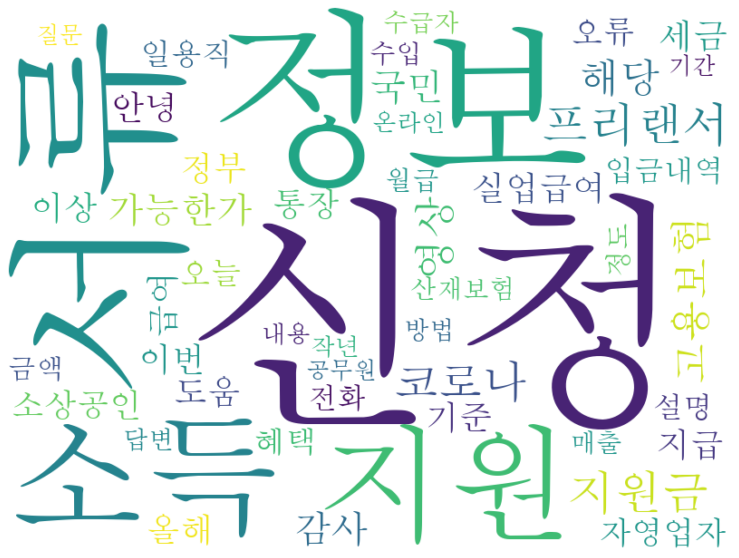

In [76]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
cloud = WordCloud(font_path='C:/windows/fonts/batang.ttc', width=800, height=600,background_color='white').generate_from_frequencies(answer_top50)
plt.figure(figsize=(30,10))
plt.imshow(cloud, interpolation='bilinear')  # 글자를 더 부드럽게 나오게 한다
plt.axis('off')                              # X축과 Y축의 위치 정보 off
plt.show()

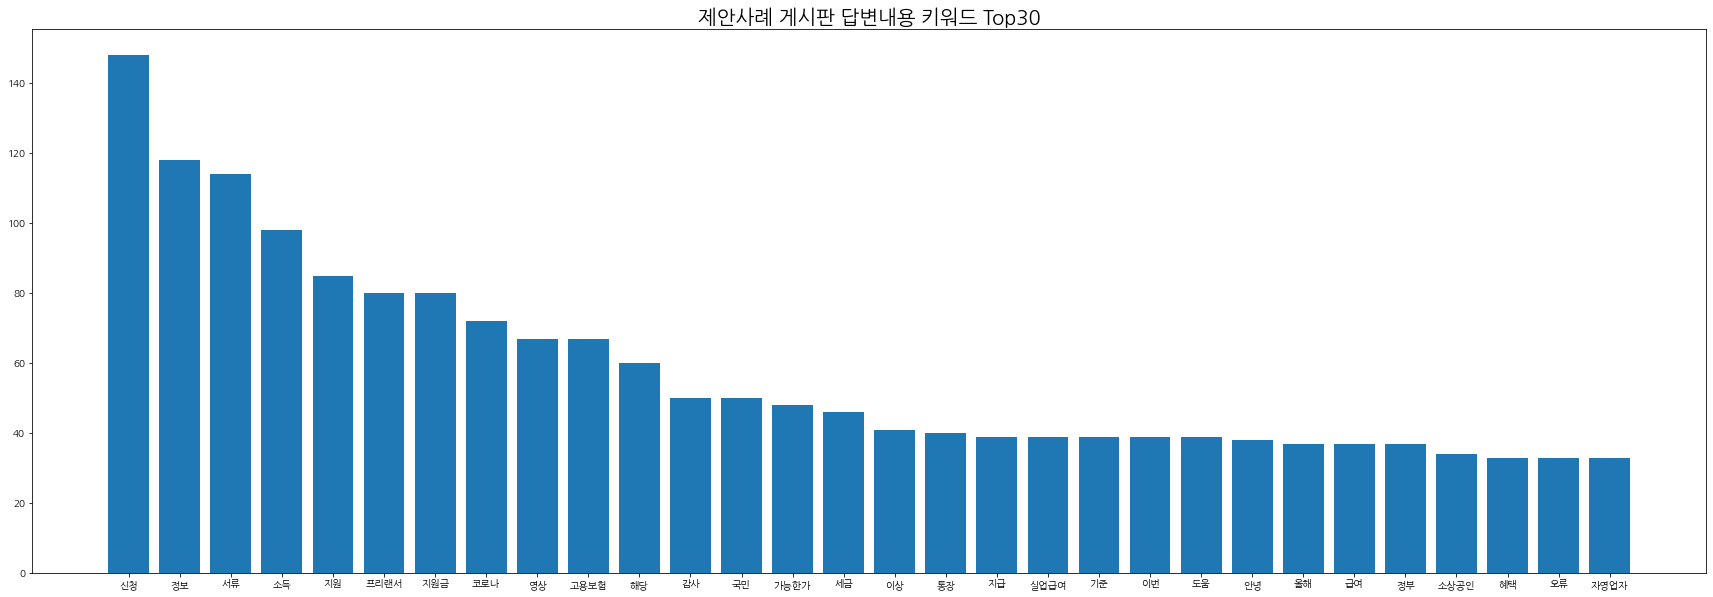

In [77]:
import matplotlib.pyplot as plt
import matplotlib
import matplotlib.font_manager as fm
fm.get_fontconfig_fonts()
# font_location = '/usr/share/fonts/truetype/nanum/NanumGothicOTF.ttf'
font_location = 'C:/Windows/Fonts/NanumGothic.ttf' # For Windows
font_name = fm.FontProperties(fname=font_location).get_name()
matplotlib.rc('font', family=font_name)

top_title_keys=[i for i in answer_top50.keys()]
top_title_values=[i for i in answer_top50.values()]

plt.figure(figsize= (30,10))
plt.title("제안사례 게시판 답변내용 키워드 Top30", fontsize=20)
plt.bar(list(top_title_keys[:30]), list(top_title_values[:30]))
plt.show()

In [78]:
#content_top_100 

answer_top50_word2id = {w: i for i, w in enumerate(answer_top50.keys())}
answer_top50_word2id

{'신청': 0,
 '정보': 1,
 '서류': 2,
 '소득': 3,
 '지원': 4,
 '프리랜서': 5,
 '지원금': 6,
 '코로나': 7,
 '영상': 8,
 '고용보험': 9,
 '해당': 10,
 '감사': 11,
 '국민': 12,
 '가능한가': 13,
 '세금': 14,
 '이상': 15,
 '통장': 16,
 '지급': 17,
 '실업급여': 18,
 '기준': 19,
 '이번': 20,
 '도움': 21,
 '안녕': 22,
 '올해': 23,
 '급여': 24,
 '정부': 25,
 '소상공인': 26,
 '혜택': 27,
 '오류': 28,
 '자영업자': 29,
 '일용직': 30,
 '오늘': 31,
 '설명': 32,
 '입금내역': 33,
 '전화': 34,
 '금액': 35,
 '월급': 36,
 '정도': 37,
 '수입': 38,
 '매출': 39,
 '산재보험': 40,
 '방법': 41,
 '수급자': 42,
 '답변': 43,
 '작년': 44,
 '온라인': 45,
 '내용': 46,
 '기간': 47,
 '질문': 48,
 '공무원': 49}

In [79]:
#content_top_100 

answer_top30_word2id = {w: i for i, w in enumerate(answer_top30.keys())}
answer_top30_word2id

{'신청': 0,
 '정보': 1,
 '서류': 2,
 '소득': 3,
 '지원': 4,
 '프리랜서': 5,
 '지원금': 6,
 '코로나': 7,
 '영상': 8,
 '고용보험': 9,
 '해당': 10,
 '감사': 11,
 '국민': 12,
 '가능한가': 13,
 '세금': 14,
 '이상': 15,
 '통장': 16,
 '지급': 17,
 '실업급여': 18,
 '기준': 19,
 '이번': 20,
 '도움': 21,
 '안녕': 22,
 '올해': 23,
 '급여': 24,
 '정부': 25,
 '소상공인': 26,
 '혜택': 27,
 '오류': 28,
 '자영업자': 29}

In [80]:

answer_top30_word2id = {w: i for i, w in enumerate(answer_top30.keys())}
answer_top30_word2id

{'신청': 0,
 '정보': 1,
 '서류': 2,
 '소득': 3,
 '지원': 4,
 '프리랜서': 5,
 '지원금': 6,
 '코로나': 7,
 '영상': 8,
 '고용보험': 9,
 '해당': 10,
 '감사': 11,
 '국민': 12,
 '가능한가': 13,
 '세금': 14,
 '이상': 15,
 '통장': 16,
 '지급': 17,
 '실업급여': 18,
 '기준': 19,
 '이번': 20,
 '도움': 21,
 '안녕': 22,
 '올해': 23,
 '급여': 24,
 '정부': 25,
 '소상공인': 26,
 '혜택': 27,
 '오류': 28,
 '자영업자': 29}

In [81]:
answer_top50_id2word = {i: w for i, w in enumerate(answer_top50.keys())}
answer_top50_id2word

{0: '신청',
 1: '정보',
 2: '서류',
 3: '소득',
 4: '지원',
 5: '프리랜서',
 6: '지원금',
 7: '코로나',
 8: '영상',
 9: '고용보험',
 10: '해당',
 11: '감사',
 12: '국민',
 13: '가능한가',
 14: '세금',
 15: '이상',
 16: '통장',
 17: '지급',
 18: '실업급여',
 19: '기준',
 20: '이번',
 21: '도움',
 22: '안녕',
 23: '올해',
 24: '급여',
 25: '정부',
 26: '소상공인',
 27: '혜택',
 28: '오류',
 29: '자영업자',
 30: '일용직',
 31: '오늘',
 32: '설명',
 33: '입금내역',
 34: '전화',
 35: '금액',
 36: '월급',
 37: '정도',
 38: '수입',
 39: '매출',
 40: '산재보험',
 41: '방법',
 42: '수급자',
 43: '답변',
 44: '작년',
 45: '온라인',
 46: '내용',
 47: '기간',
 48: '질문',
 49: '공무원'}

In [82]:
answer_top30_id2word = {i: w for i, w in enumerate(answer_top30.keys())}
answer_top30_id2word

{0: '신청',
 1: '정보',
 2: '서류',
 3: '소득',
 4: '지원',
 5: '프리랜서',
 6: '지원금',
 7: '코로나',
 8: '영상',
 9: '고용보험',
 10: '해당',
 11: '감사',
 12: '국민',
 13: '가능한가',
 14: '세금',
 15: '이상',
 16: '통장',
 17: '지급',
 18: '실업급여',
 19: '기준',
 20: '이번',
 21: '도움',
 22: '안녕',
 23: '올해',
 24: '급여',
 25: '정부',
 26: '소상공인',
 27: '혜택',
 28: '오류',
 29: '자영업자'}

In [83]:
import numpy as np

# 50 단어 인접행렬
answer_adjacent_matrix_50 = np.zeros((50, 50), int)
for sentence in answer_sentences_nouns_result:
    for wi, i in answer_top50_word2id.items():
        if wi in sentence:
            for wj, j in answer_top50_word2id.items():
                if i != j and wj in sentence:
                    answer_adjacent_matrix_50[i][j] += 1
answer_adjacent_matrix_50

array([[0, 1, 4, ..., 2, 0, 0],
       [1, 0, 0, ..., 1, 0, 0],
       [4, 0, 0, ..., 0, 0, 1],
       ...,
       [2, 1, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0]])

In [84]:
answer_sentences_nouns_result

[['컨텐츠'],
 ['설명', '감사'],
 ['안녕', '요즘', '영상', '헬스트레이너', '시간정도', '기본급', '수업', '진행', '인센티브', '구조', '절차'],
 ['특수근로자', '해당'],
 ['영상'],
 [],
 ['안전'],
 [],
 [],
 ['해당요건'],
 ['정보', '상세', '설명'],
 [],
 ['소득', '인터넷', '건강보험료', '건강보', '사이트', '세대원', '강보'],
 ['통화', '폭주상태'],
 [],
 [],
 [],
 ['정보'],
 ['지인', '기초생활수급자'],
 ['아빠', '엄마', '뇌수술', '중환자실'],
 [],
 ['할머니', '누나', '성인'],
 ['학생', '직장', '한명인', '혜택'],
 [],
 ['소득', '이하', '소득감소', '올해'],
 ['작년', '증감', '변화', '신청자', '해당'],
 [],
 ['양질', '일자리', '창출', '부탁'],
 ['프리랜서',
  '평생교육',
  '강사',
  '작년',
  '코로나',
  '수입',
  '의료보험',
  '작년',
  '내기',
  '시작',
  '이유',
  '지원'],
 ['무급', '직업', '청춘', '지급'],
 ['친절', '설명', '가구원', '지원금', '해당사항', '지원금'],
 ['가구'],
 [],
 ['개인사업자', '연매출', '이상', '소득증명', '신청'],
 [],
 [],
 [],
 [],
 [],
 ['프리랜서'],
 [],
 ['프리랜서', '소득문제', '인터넷관련', '사업자', '프리랜서', '현실적', '매출'],
 [],
 ['긴급고용안정지원금'],
 [],
 ['지원대상', '요건'],
 ['지원대상', '세부', '설명'],
 ['지원', '세부', '설명'],
 ['신천기', '방법'],
 [],
 ['기존', '지원금', '중복', '가능', '여부'],
 ['외국인', '가능'],
 [],
 ['모의확인', '문의저', '프리랜서

In [85]:
import numpy as np

# 50 단어 인접행렬
answer_adjacent_matrix_30 = np.zeros((30, 30), int)
for sentence in answer_sentences_nouns_result:
    for wi, i in answer_top30_word2id.items():
        if wi in sentence:
            for wj, j in answer_top30_word2id.items():
                if i != j and wj in sentence:
                    answer_adjacent_matrix_30[i][j] += 1
answer_adjacent_matrix_30

array([[ 0,  1,  4,  3,  8,  9, 14,  2,  2,  4,  2,  1,  0, 10,  0,  3,
         1,  3,  4,  1,  1,  1,  2,  0,  3,  1,  3,  0,  7,  2],
       [ 1,  0,  0,  0,  0,  1,  0,  0,  2,  0,  2, 17,  0,  1,  0,  0,
         0,  0,  1,  0,  0,  5,  1,  0,  0,  0,  0,  1,  0,  0],
       [ 4,  0,  0,  4,  2,  2,  2,  2,  1,  3,  1,  0,  1,  0,  1,  0,
         4,  2,  0,  0,  1,  0,  0,  1,  0,  0,  2,  1,  1,  2],
       [ 3,  0,  4,  0,  1,  2,  2,  9,  2,  2,  8,  0,  0,  4,  1,  4,
         4,  1,  1,  4,  3,  0,  0,  7,  3,  0,  1,  0,  0,  2],
       [ 8,  0,  2,  1,  0,  6,  6,  5,  2,  2,  1,  0,  2,  1,  1,  2,
         2,  3,  0,  0,  6,  1,  1,  2,  1,  2,  2,  2,  0,  2],
       [ 9,  1,  2,  2,  6,  0,  7,  5,  2,  9,  1,  0,  0,  1,  1,  0,
         0,  1,  1,  3,  0,  1,  0,  4,  0,  3,  0,  3,  1,  2],
       [14,  0,  2,  2,  6,  7,  0,  5,  2,  0,  2,  0,  0,  1,  0,  2,
         2,  4,  0,  1,  1,  0,  1,  5,  0,  1,  2,  0,  1,  2],
       [ 2,  0,  2,  9,  5,  5,  5,  0,  

In [86]:
answer_adjacent_matrix_50.shape, answer_adjacent_matrix_30.shape

((50, 50), (30, 30))

In [87]:
import networkx as nx
answer_network_30 = nx.from_numpy_matrix(answer_adjacent_matrix_30)
list(answer_network_30.adjacency())

[(0,
  {1: {'weight': 1},
   2: {'weight': 4},
   3: {'weight': 3},
   4: {'weight': 8},
   5: {'weight': 9},
   6: {'weight': 14},
   7: {'weight': 2},
   8: {'weight': 2},
   9: {'weight': 4},
   10: {'weight': 2},
   11: {'weight': 1},
   13: {'weight': 10},
   15: {'weight': 3},
   16: {'weight': 1},
   17: {'weight': 3},
   18: {'weight': 4},
   19: {'weight': 1},
   20: {'weight': 1},
   21: {'weight': 1},
   22: {'weight': 2},
   24: {'weight': 3},
   25: {'weight': 1},
   26: {'weight': 3},
   28: {'weight': 7},
   29: {'weight': 2}}),
 (1,
  {0: {'weight': 1},
   5: {'weight': 1},
   8: {'weight': 2},
   10: {'weight': 2},
   11: {'weight': 17},
   13: {'weight': 1},
   18: {'weight': 1},
   21: {'weight': 5},
   22: {'weight': 1},
   27: {'weight': 1}}),
 (2,
  {0: {'weight': 4},
   3: {'weight': 4},
   4: {'weight': 2},
   5: {'weight': 2},
   6: {'weight': 2},
   7: {'weight': 2},
   8: {'weight': 1},
   9: {'weight': 3},
   10: {'weight': 1},
   12: {'weight': 1},
   14: {

In [88]:
answer_network_50 = nx.from_numpy_matrix(answer_adjacent_matrix_50)
list(answer_network_50.adjacency())

[(0,
  {1: {'weight': 1},
   2: {'weight': 4},
   3: {'weight': 3},
   4: {'weight': 8},
   5: {'weight': 9},
   6: {'weight': 14},
   7: {'weight': 2},
   8: {'weight': 2},
   9: {'weight': 4},
   10: {'weight': 2},
   11: {'weight': 1},
   13: {'weight': 10},
   15: {'weight': 3},
   16: {'weight': 1},
   17: {'weight': 3},
   18: {'weight': 4},
   19: {'weight': 1},
   20: {'weight': 1},
   21: {'weight': 1},
   22: {'weight': 2},
   24: {'weight': 3},
   25: {'weight': 1},
   26: {'weight': 3},
   28: {'weight': 7},
   29: {'weight': 2},
   30: {'weight': 1},
   31: {'weight': 2},
   34: {'weight': 2},
   35: {'weight': 1},
   36: {'weight': 3},
   38: {'weight': 1},
   39: {'weight': 1},
   41: {'weight': 6},
   45: {'weight': 2},
   47: {'weight': 2}}),
 (1,
  {0: {'weight': 1},
   5: {'weight': 1},
   8: {'weight': 2},
   10: {'weight': 2},
   11: {'weight': 17},
   13: {'weight': 1},
   18: {'weight': 1},
   21: {'weight': 5},
   22: {'weight': 1},
   27: {'weight': 1},
   31: 

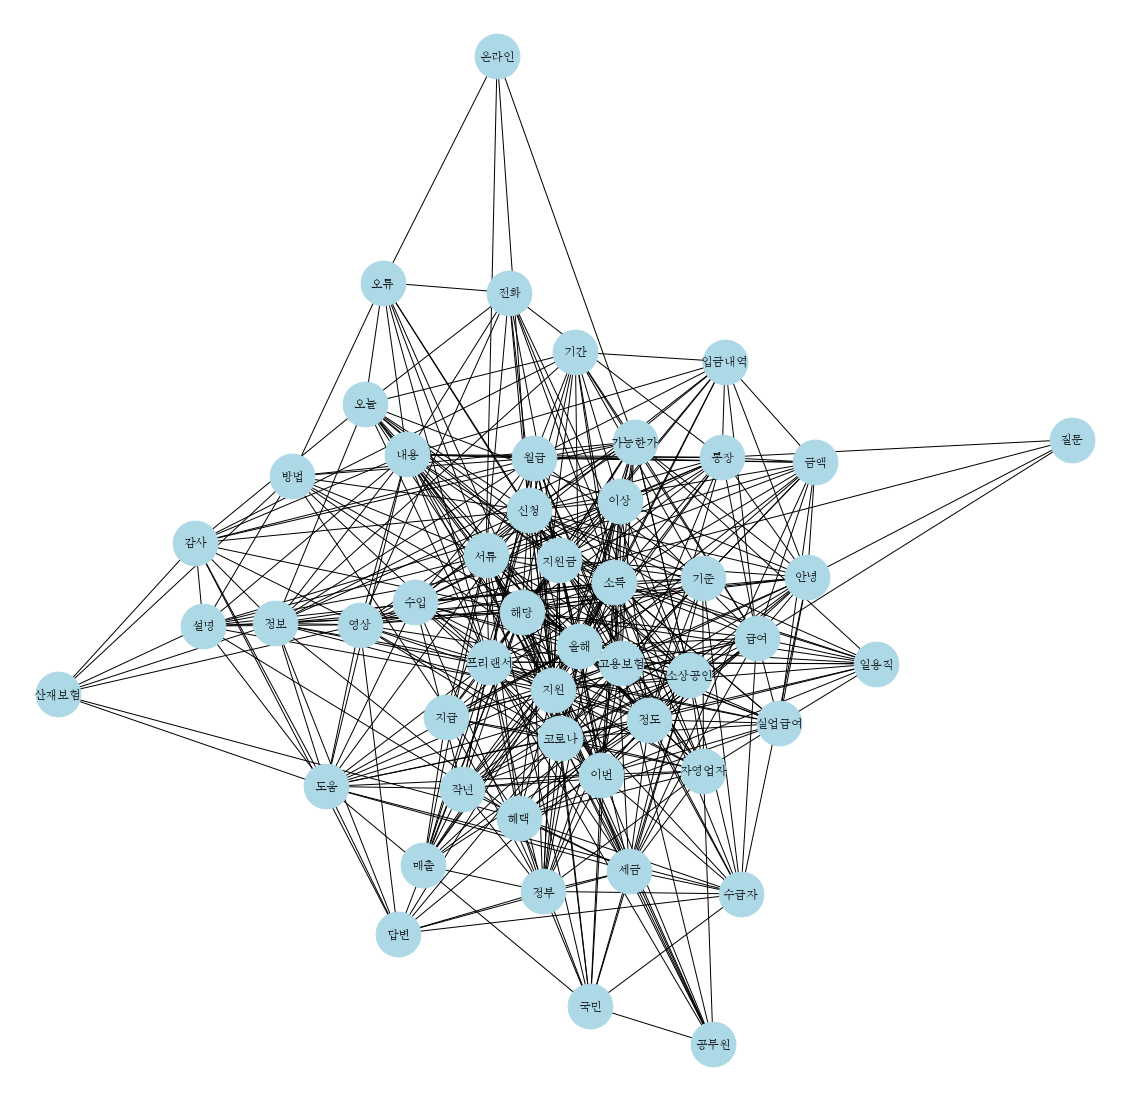

In [89]:
import matplotlib.pyplot as plt
from matplotlib import font_manager as fm
from matplotlib import rc

font_path="C:/Windows/Fonts/batang.ttc"
font_name = fm.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)

fig = plt.figure()
fig.set_size_inches(20, 20)
ax = fig.add_subplot(1, 1, 1)
ax.axis("off")
option = {
    'node_color' : 'lightblue',
    'node_size' : 2000,
    'size' : 2
}

'''
# 키워드 50개로 네트워크
'''

#G1=nx.Graph(san_network, labels=san_id2word, font_family=font_name, ax=ax)
nx.draw(answer_network_50, labels=answer_top50_id2word, font_family=font_name, ax=ax, **option)
#nx.draw(san_network, labels=san_id2word, font_family=font_name, ax=ax, **option)

#nx.write_graphml(G1, 'graphfile.graphml')
#nx.write_gexf(G1, 'sanjae_insurance.gexf')
plt.show()

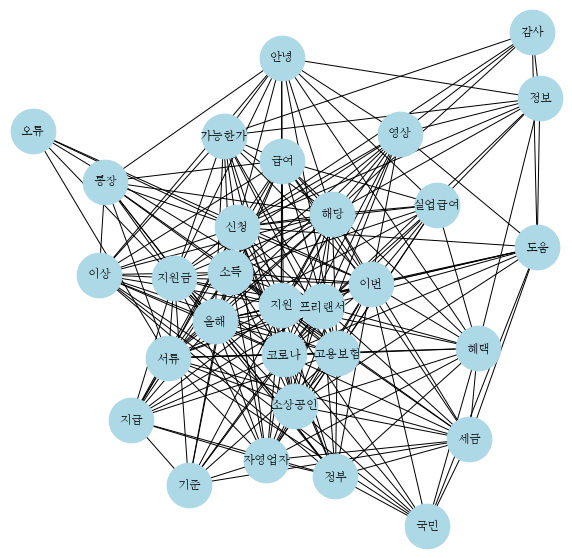

In [90]:
import matplotlib.pyplot as plt
from matplotlib import font_manager as fm
from matplotlib import rc

font_path="C:/Windows/Fonts/batang.ttc"
font_name = fm.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)

fig = plt.figure()
fig.set_size_inches(10, 10)
ax = fig.add_subplot(1, 1, 1)
ax.axis("off")
option = {
    'node_color' : 'lightblue',
    'node_size' : 2000,
    'size' : 2
}

'''
# 키워드 30개로 네트워크
'''

#G1=nx.Graph(san_network, labels=san_id2word, font_family=font_name, ax=ax)
nx.draw(answer_network_30, labels=answer_top30_id2word, font_family=font_name, ax=ax, **option)
#nx.draw(san_network, labels=san_id2word, font_family=font_name, ax=ax, **option)

#nx.write_graphml(G1, 'graphfile.graphml')
#nx.write_gexf(G1, 'sanjae_insurance.gexf')
plt.show()

# 근접중심성

In [50]:
#Closeness
nx.closeness_centrality(answer_network_50, distance='weight')

{0: 0.5531812725090036,
 1: 0.5531812725090036,
 2: 0.566510941726088,
 3: 0.566510941726088,
 4: 0.5734196117471378,
 5: 0.566510941726088,
 6: 0.5734196117471378,
 7: 0.47980008329862556,
 8: 0.4749536178107607,
 9: 0.4749536178107607,
 10: 0.5804988662131518,
 11: 0.5110913930789707,
 12: 0.5167077820139044,
 13: 0.546748932130992,
 14: 0.0,
 15: 0.566510941726088,
 16: 0.546748932130992,
 17: 0.5055957867017774,
 18: 0.4847464759099516,
 19: 0.5110913930789707,
 20: 0.5110913930789707,
 21: 0.546748932130992,
 22: 0.5531812725090036,
 23: 0.5734196117471378,
 24: 0.5224489795918367,
 25: 0.5597667638483964,
 26: 0.5283191928456775,
 27: 0.5531812725090036,
 28: 0.5224489795918367,
 29: 0.5283191928456775,
 30: 0.5167077820139044,
 31: 0.5055957867017774,
 32: 0.5283191928456775,
 33: 0.5343228200371057,
 34: 0.5055957867017774,
 35: 0.4847464759099516,
 36: 0.5167077820139044,
 37: 0.5055957867017774,
 38: 0.566510941726088,
 39: 0.6028257456828886,
 40: 0.5167077820139044,
 41: 0.

In [51]:
#Closeness
nx.closeness_centrality(answer_network_30, distance='weight')

{0: 0.5517241379310345,
 1: 0.5517241379310345,
 2: 0.5517241379310345,
 3: 0.4827586206896552,
 4: 0.5517241379310345,
 5: 0.5406896551724139,
 6: 0.5300878972278568,
 7: 0.4505747126436782,
 8: 0.4661117717003568,
 9: 0.45821157218001174,
 10: 0.5752017608217168,
 11: 0.4360400444938821,
 12: 0.519893899204244,
 13: 0.5517241379310345,
 14: 0.0,
 15: 0.5632183908045978,
 16: 0.5632183908045978,
 17: 0.4505747126436782,
 18: 0.47428917120387176,
 19: 0.47428917120387176,
 20: 0.4505747126436782,
 21: 0.5300878972278568,
 22: 0.5406896551724139,
 23: 0.5752017608217168,
 24: 0.519893899204244,
 25: 0.519893899204244,
 26: 0.5406896551724139,
 27: 0.5517241379310345,
 28: 0.5300878972278568,
 29: 0.5006385696040868}

# 연결중심성

In [52]:
#Degree
nx.degree_centrality(answer_network_50)

{0: 0.7346938775510203,
 1: 0.4081632653061224,
 2: 0.6326530612244897,
 3: 0.7346938775510203,
 4: 0.7142857142857142,
 5: 0.6122448979591836,
 6: 0.6122448979591836,
 7: 0.6326530612244897,
 8: 0.42857142857142855,
 9: 0.5510204081632653,
 10: 0.6326530612244897,
 11: 0.2857142857142857,
 12: 0.22448979591836732,
 13: 0.42857142857142855,
 14: 0.0,
 15: 0.4081632653061224,
 16: 0.4081632653061224,
 17: 0.36734693877551017,
 18: 0.2857142857142857,
 19: 0.32653061224489793,
 20: 0.32653061224489793,
 21: 0.5102040816326531,
 22: 0.42857142857142855,
 23: 0.4081632653061224,
 24: 0.22448979591836732,
 25: 0.5714285714285714,
 26: 0.4693877551020408,
 27: 0.4081632653061224,
 28: 0.3877551020408163,
 29: 0.3877551020408163,
 30: 0.2040816326530612,
 31: 0.3877551020408163,
 32: 0.2857142857142857,
 33: 0.3469387755102041,
 34: 0.2857142857142857,
 35: 0.26530612244897955,
 36: 0.24489795918367346,
 37: 0.32653061224489793,
 38: 0.4693877551020408,
 39: 0.4897959183673469,
 40: 0.3673469

In [53]:
#Degree
nx.degree_centrality(answer_network_30)

{0: 0.8275862068965517,
 1: 0.3793103448275862,
 2: 0.6206896551724138,
 3: 0.6896551724137931,
 4: 0.7931034482758621,
 5: 0.6551724137931034,
 6: 0.6551724137931034,
 7: 0.7586206896551724,
 8: 0.5172413793103449,
 9: 0.6551724137931034,
 10: 0.7586206896551724,
 11: 0.24137931034482757,
 12: 0.3448275862068966,
 13: 0.5172413793103449,
 14: 0.0,
 15: 0.4482758620689655,
 16: 0.5172413793103449,
 17: 0.3793103448275862,
 18: 0.41379310344827586,
 19: 0.41379310344827586,
 20: 0.3103448275862069,
 21: 0.6206896551724138,
 22: 0.4482758620689655,
 23: 0.48275862068965514,
 24: 0.3103448275862069,
 25: 0.5862068965517241,
 26: 0.5517241379310345,
 27: 0.48275862068965514,
 28: 0.5517241379310345,
 29: 0.4482758620689655}

# 위세중심성

In [54]:
#Eigenvector
nx.eigenvector_centrality(answer_network_50, weight='weight')

{0: 0.3304246418046415,
 1: 0.07252698945410276,
 2: 0.1636115356143802,
 3: 0.2687535848830743,
 4: 0.25342033904140066,
 5: 0.2868315538825217,
 6: 0.27438071010031334,
 7: 0.32725389147968575,
 8: 0.10375647262308826,
 9: 0.2467797246142297,
 10: 0.17265591872484745,
 11: 0.06098878913557389,
 12: 0.04216112188122945,
 13: 0.14348463523930735,
 14: 5.331207605618659e-26,
 15: 0.0632975795427729,
 16: 0.10885894163858237,
 17: 0.11320334568209477,
 18: 0.12388933317171277,
 19: 0.08987158060971656,
 20: 0.10070948649287335,
 21: 0.1734941804410582,
 22: 0.07336932197185751,
 23: 0.06298528430393388,
 24: 0.03686786136556804,
 25: 0.24271932401283972,
 26: 0.11211161244933503,
 27: 0.08958815511218483,
 28: 0.11869986684303155,
 29: 0.08538253001550844,
 30: 0.06313999333930446,
 31: 0.11515849120733868,
 32: 0.06410719543061441,
 33: 0.06764246883034493,
 34: 0.05285969034816691,
 35: 0.06992985601782822,
 36: 0.04546367474728931,
 37: 0.0706618149895116,
 38: 0.10732425377131193,
 3

In [55]:
#Eigenvector
nx.eigenvector_centrality(answer_network_30, weight='weight')

{0: 0.36584843110248516,
 1: 0.06384021127544007,
 2: 0.16053108976015273,
 3: 0.27837924850221896,
 4: 0.2805290762797644,
 5: 0.3090921345857471,
 6: 0.3143710877499086,
 7: 0.33690553003745,
 8: 0.1109727679649167,
 9: 0.2674376312558442,
 10: 0.18774192472620785,
 11: 0.0590059746497928,
 12: 0.04966738450325353,
 13: 0.16584842609591172,
 14: 4.15008809307491e-25,
 15: 0.061435649505743276,
 16: 0.12197837921809182,
 17: 0.09743639377703836,
 18: 0.14781540465050824,
 19: 0.1026974255483604,
 20: 0.10704459876948076,
 21: 0.18836784519603347,
 22: 0.06938632529118453,
 23: 0.06424132846058254,
 24: 0.04149668489184657,
 25: 0.22839898076927884,
 26: 0.11629653172336782,
 27: 0.09485031245796798,
 28: 0.13307465269594118,
 29: 0.09571882267156714}

# 근접중심성

In [56]:
#Current Flow Closeness
nx.current_flow_closeness_centrality(answer_network_50)

NetworkXError: Graph not connected.

In [57]:
#Current Flow Closeness
nx.current_flow_closeness_centrality(answer_network_30)

NetworkXError: Graph not connected.

In [58]:
#Closeness
nx.closeness_centrality(answer_network_50, distance='weight')

{0: 0.5531812725090036,
 1: 0.5531812725090036,
 2: 0.566510941726088,
 3: 0.566510941726088,
 4: 0.5734196117471378,
 5: 0.566510941726088,
 6: 0.5734196117471378,
 7: 0.47980008329862556,
 8: 0.4749536178107607,
 9: 0.4749536178107607,
 10: 0.5804988662131518,
 11: 0.5110913930789707,
 12: 0.5167077820139044,
 13: 0.546748932130992,
 14: 0.0,
 15: 0.566510941726088,
 16: 0.546748932130992,
 17: 0.5055957867017774,
 18: 0.4847464759099516,
 19: 0.5110913930789707,
 20: 0.5110913930789707,
 21: 0.546748932130992,
 22: 0.5531812725090036,
 23: 0.5734196117471378,
 24: 0.5224489795918367,
 25: 0.5597667638483964,
 26: 0.5283191928456775,
 27: 0.5531812725090036,
 28: 0.5224489795918367,
 29: 0.5283191928456775,
 30: 0.5167077820139044,
 31: 0.5055957867017774,
 32: 0.5283191928456775,
 33: 0.5343228200371057,
 34: 0.5055957867017774,
 35: 0.4847464759099516,
 36: 0.5167077820139044,
 37: 0.5055957867017774,
 38: 0.566510941726088,
 39: 0.6028257456828886,
 40: 0.5167077820139044,
 41: 0.

In [59]:
#Closeness
nx.closeness_centrality(answer_network_30, distance='weight')

{0: 0.5517241379310345,
 1: 0.5517241379310345,
 2: 0.5517241379310345,
 3: 0.4827586206896552,
 4: 0.5517241379310345,
 5: 0.5406896551724139,
 6: 0.5300878972278568,
 7: 0.4505747126436782,
 8: 0.4661117717003568,
 9: 0.45821157218001174,
 10: 0.5752017608217168,
 11: 0.4360400444938821,
 12: 0.519893899204244,
 13: 0.5517241379310345,
 14: 0.0,
 15: 0.5632183908045978,
 16: 0.5632183908045978,
 17: 0.4505747126436782,
 18: 0.47428917120387176,
 19: 0.47428917120387176,
 20: 0.4505747126436782,
 21: 0.5300878972278568,
 22: 0.5406896551724139,
 23: 0.5752017608217168,
 24: 0.519893899204244,
 25: 0.519893899204244,
 26: 0.5406896551724139,
 27: 0.5517241379310345,
 28: 0.5300878972278568,
 29: 0.5006385696040868}

# 매개중심성

In [60]:
#Current Flow Betweenness
nx.current_flow_betweenness_centrality(answer_network_50)

NetworkXError: Graph not connected.

In [61]:
#Current Flow Betweenness
nx.current_flow_betweenness_centrality(answer_network_30)

NetworkXError: Graph not connected.

In [62]:
#Communicability Betweenness
nx.communicability_betweenness_centrality(answer_network_50)

C:\Users\admin\AppData\Local\conda\conda\envs\kyu3.7\lib\site-packages\networkx\algorithms\centrality\subgraph_alg.py:246: RuntimeWarning: invalid value encountered in true_divide
  B = (expA - scipy.linalg.expm(A.A)) / expA


{0: nan,
 1: nan,
 2: nan,
 3: nan,
 4: nan,
 5: nan,
 6: nan,
 7: nan,
 8: nan,
 9: nan,
 10: nan,
 11: nan,
 12: nan,
 13: nan,
 14: 0.0,
 15: nan,
 16: nan,
 17: nan,
 18: nan,
 19: nan,
 20: nan,
 21: nan,
 22: nan,
 23: nan,
 24: nan,
 25: nan,
 26: nan,
 27: nan,
 28: nan,
 29: nan,
 30: nan,
 31: nan,
 32: nan,
 33: nan,
 34: nan,
 35: nan,
 36: nan,
 37: nan,
 38: nan,
 39: nan,
 40: nan,
 41: nan,
 42: nan,
 43: nan,
 44: nan,
 45: nan,
 46: nan,
 47: nan,
 48: nan,
 49: nan}

In [63]:
G1_answer_50words=nx.Graph(answer_network_50, labels=answer_top50_word2id, font_family=font_name, ax=ax)
G1_answer_50words

In [64]:
G1_answer_30words=nx.Graph(answer_network_30, labels=answer_top30_word2id, font_family=font_name, ax=ax)
G1_answer_30words

In [65]:
# nx.write_gexf(G1_answer_50words, '산업재해보상보험_50keyword_graph.gexf')

In [66]:
# nx.write_gexf(G1_answer_30words, '산업재해보상보험_30keyword_graph.gexf')

In [67]:
#Degree -  ------------------------- 연결중심성
import networkx

labels = list(answer_top50_word2id.keys())
values = list(nx.degree_centrality(answer_network_50).values())

연결중심성=[]
for i, j in zip(labels,values):
    연결중심성.append((i,j))
연결중심성 = dict(연결중심성)
연결중심성

{'신청': 0.7346938775510203,
 '정보': 0.4081632653061224,
 '서류': 0.6326530612244897,
 '소득': 0.7346938775510203,
 '지원': 0.7142857142857142,
 '프리랜서': 0.6122448979591836,
 '지원금': 0.6122448979591836,
 '코로나': 0.6326530612244897,
 '영상': 0.42857142857142855,
 '고용보험': 0.5510204081632653,
 '해당': 0.6326530612244897,
 '감사': 0.2857142857142857,
 '국민': 0.22448979591836732,
 '가능한가': 0.42857142857142855,
 '자원관리도우미': 0.0,
 '세금': 0.4081632653061224,
 '이상': 0.4081632653061224,
 '통장': 0.36734693877551017,
 '지급': 0.2857142857142857,
 '실업급여': 0.32653061224489793,
 '기준': 0.32653061224489793,
 '이번': 0.5102040816326531,
 '도움': 0.42857142857142855,
 '안녕': 0.4081632653061224,
 '은정': 0.22448979591836732,
 '올해': 0.5714285714285714,
 '급여': 0.4693877551020408,
 '정부': 0.4081632653061224,
 '소상공인': 0.3877551020408163,
 '혜택': 0.3877551020408163,
 '오류': 0.2040816326530612,
 '자영업자': 0.3877551020408163,
 '일용직': 0.2857142857142857,
 '오늘': 0.3469387755102041,
 '설명': 0.2857142857142857,
 '입금내역': 0.26530612244897955,
 '전화': 0.244

In [68]:
#Degree -  ------------------------- 연결중심성
import networkx

labels = list(answer_top30_word2id.keys())
values = list(nx.degree_centrality(answer_network_30).values())

연결중심성=[]
for i, j in zip(labels,values):
    연결중심성.append((i,j))
연결중심성 = dict(연결중심성)
연결중심성

{'신청': 0.8275862068965517,
 '정보': 0.3793103448275862,
 '서류': 0.6206896551724138,
 '소득': 0.6896551724137931,
 '지원': 0.7931034482758621,
 '프리랜서': 0.6551724137931034,
 '지원금': 0.6551724137931034,
 '코로나': 0.7586206896551724,
 '영상': 0.5172413793103449,
 '고용보험': 0.6551724137931034,
 '해당': 0.7586206896551724,
 '감사': 0.24137931034482757,
 '국민': 0.3448275862068966,
 '가능한가': 0.5172413793103449,
 '자원관리도우미': 0.0,
 '세금': 0.4482758620689655,
 '이상': 0.5172413793103449,
 '통장': 0.3793103448275862,
 '지급': 0.41379310344827586,
 '실업급여': 0.41379310344827586,
 '기준': 0.3103448275862069,
 '이번': 0.6206896551724138,
 '도움': 0.4482758620689655,
 '안녕': 0.48275862068965514,
 '은정': 0.3103448275862069,
 '올해': 0.5862068965517241,
 '급여': 0.5517241379310345,
 '정부': 0.48275862068965514,
 '소상공인': 0.5517241379310345,
 '혜택': 0.4482758620689655}

In [69]:
answer_top50_word2id

{'신청': 0,
 '정보': 1,
 '서류': 2,
 '소득': 3,
 '지원': 4,
 '프리랜서': 5,
 '지원금': 6,
 '코로나': 7,
 '영상': 8,
 '고용보험': 9,
 '해당': 10,
 '감사': 11,
 '국민': 12,
 '가능한가': 13,
 '자원관리도우미': 14,
 '세금': 15,
 '이상': 16,
 '통장': 17,
 '지급': 18,
 '실업급여': 19,
 '기준': 20,
 '이번': 21,
 '도움': 22,
 '안녕': 23,
 '은정': 24,
 '올해': 25,
 '급여': 26,
 '정부': 27,
 '소상공인': 28,
 '혜택': 29,
 '오류': 30,
 '자영업자': 31,
 '일용직': 32,
 '오늘': 33,
 '설명': 34,
 '입금내역': 35,
 '전화': 36,
 '금액': 37,
 '월급': 38,
 '정도': 39,
 '수입': 40,
 '매출': 41,
 '산재보험': 42,
 '방법': 43,
 '수급자': 44,
 '답변': 45,
 '작년': 46,
 '온라인': 47,
 '내용': 48,
 '기간': 49}

In [70]:
print(연결중심성.keys())

dict_keys(['신청', '정보', '서류', '소득', '지원', '프리랜서', '지원금', '코로나', '영상', '고용보험', '해당', '감사', '국민', '가능한가', '자원관리도우미', '세금', '이상', '통장', '지급', '실업급여', '기준', '이번', '도움', '안녕', '은정', '올해', '급여', '정부', '소상공인', '혜택'])
